# 1. Introducton of MNIST Dataset

MNIS is database of handwritten digits, it has 60K training and 10K testing images/examples. We will try to built a simple sequential model to classify test examples and predict the label of test examples. More about MNIST can be found here [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

I am using GPU provided by Kaggle for faster training of the model.

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
SEED=42

print("Tensorflow version {}".format(tf.__version__))

Tensorflow version 2.4.1


# 2. Data Preprocessing 

In [2]:
#Downloading dataset from library

mnist = tf.keras.datasets.mnist

(x_train,y_train ), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('Shape of the training dataset is {}'.format(x_train.shape))

print('Shape of the test dataset is {}'.format(x_test.shape))

Shape of the training dataset is (60000, 28, 28)
Shape of the test dataset is (10000, 28, 28)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

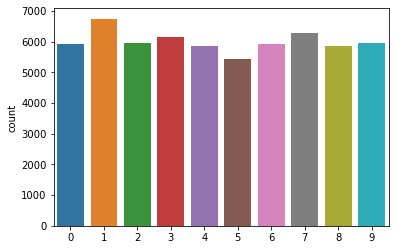

In [4]:
sns.countplot(y_train)

There are enough samples for each class to train, there is no need to downsample or upweight any category.

# 2.1  Checking NaN Value

In [5]:
np.isnan(x_train).any()

False

In [6]:
np.isnan(x_test).any()

False

# 2.2 Normalizing and Reshaping 

We will first reshape our image that is preferred as an input to our Convolutional network. First convolutional layer expect a single 60000x28x28x1 tensor instead of 60000 28x28x1 tensor shape. Last 1 is number of channel as MNIST is gray scaled images so we will keep 1 else in case of RGB it must be 3.

Model will run better for normalized value so will make sure pixel value between 0-1 range so will divide all by 255.0

In [7]:
#Reshaping
input_shape = (28,28,1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Normalizing 
x_test = x_test/255.0
x_train = x_train/255.0


print('x_train shape after reshapig and normalizing {}'.format(x_train.shape))
print('x_test shape after reshapig and normalizing {}'.format(x_test.shape))

x_train shape after reshapig and normalizing (60000, 28, 28, 1)
x_test shape after reshapig and normalizing (10000, 28, 28, 1)


# 2.3 Label Encoder
We will convert each labels into one hot vector i.e for label value of 2 one hot vector will be [0,0,1,0,0,0,0,0,0]

In [8]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


print('Shape of the train label after one hot encoding {}'.format(y_train.shape))
print('Shape of the test label after one hot encoding {}'.format(y_test.shape))

Shape of the train label after one hot encoding (60000, 10)
Shape of the test label after one hot encoding (10000, 10)


# 2.4 Digit Visulization

tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


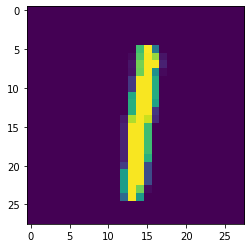

In [9]:
plt.imshow(x_train[40][:,:,0])
print(y_train[40])

# 3.CNN Model

3.1 Model Params

In [10]:
batch_size = 64
num_classes = y_train.shape[1]

epochs = 20

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding ='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding ='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')   
    
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss=
             'categorical_crossentropy', metrics=['accuracy'])

3.2 Fitting the Trainign Data

In [12]:
# creating a callback for 99.55% accuracy

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc')> 0.995):
            print("\n Reached 99.5% of accuracy!!")
            self.model.stop_training=True
            
callback= myCallback()

In [13]:
history = model.fit(x_train, y_train,
                  batch_size = batch_size,
                  epochs=epochs,
                  validation_split=0.1,
                  callbacks = [callback])

Epoch 1/20
844/844 [==============================] - 9s 6ms/step - loss: 0.4089 - accuracy: 0.8645 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0633 - accuracy: 0.9811 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 3/20
844/844 [==============================] - 5s 5ms/step - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.0246 - val_accuracy: 0.9930
Epoch 4/20
844/844 [==============================] - 5s 6ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0273 - val_accuracy: 0.9930
Epoch 5/20
844/844 [==============================] - 5s 5ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0266 - val_accuracy: 0.9940
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0269 - val_accuracy: 0.9938
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.0369 - val_accuracy: 0.9925
Epoch 

# 4. Model Evaluation 

# 4.1 Loss and Accuracy curve

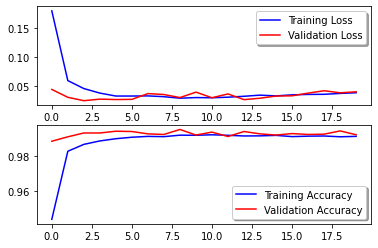

In [14]:
# Loss Curve

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'b', label = 'Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy Curve
ax[1].plot(history.history['accuracy'], color='b', label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)


#  4.2 Prediction 

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9923


# Confusion Matrix:

In [16]:
Y_pred = model.predict(x_test)


Y_pred_classes = np.argmax(Y_pred, axis=1)

Y_true = np.argmax(y_test, axis=1)

confusion_mat = tf.math.confusion_matrix(Y_true, Y_pred_classes)

<AxesSubplot:>

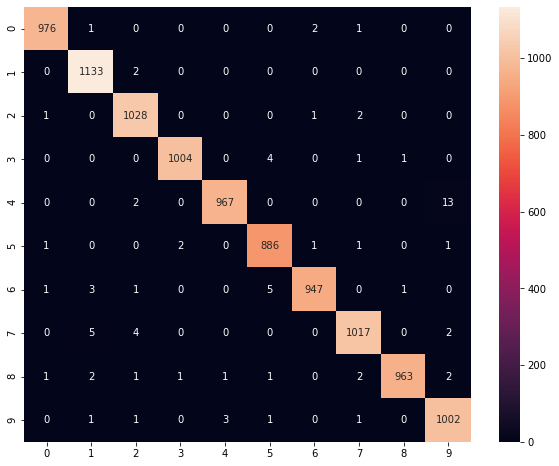

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mat, annot=True, fmt='g')

X axis is predicted label and Y axis is true label. We can see that model has highest confusion beween 0 and 6. Five digits were there whom model predicted as 0.

With sequential model and without any augementation my model has an accuray above 99% in the test dataset.

**If you found this notebook helpful please like or upvote!!! Happy learning.**